In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#import seaborn as sns
import pydicom as dcm
%matplotlib inline 
IS_LOCAL = False
import os
'''if(IS_LOCAL):
    PATH="train"
else:'''
PATH="train/"
PATH2 = "test/"
#print(os.listdir(PATH))

In [2]:
class_info_df = pd.read_csv('stage_1_detailed_class_info.csv')
train_labels_df = pd.read_csv('stage_1_train_labels.csv')  

In [4]:
print("Detailed class info -  rows:",class_info_df.shape[0]," columns:", class_info_df.shape[1])
print("Train labels -  rows:",train_labels_df.shape[0]," columns:", train_labels_df.shape[1])


('Detailed class info -  rows:', 28989, ' columns:', 2)
('Train labels -  rows:', 28989, ' columns:', 6)


In [5]:
class_info_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(train_labels_df)

,Total,Percent
height,20025,69.077926
width,20025,69.077926
y,20025,69.077926
x,20025,69.077926
Target,0,0.000000
patientId,0,0.000000


In [7]:
def get_feature_distribution(data, feature):
    # Get the count for each label
    label_counts = data[feature].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    print("Feature: {}".format(feature))
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        #percent = int((count / total_samples) * 10000) / 100
        print("{:<30s}:   {}" .format(label, count))

get_feature_distribution(class_info_df, 'class')

Feature: class
No Lung Opacity / Not Normal  :   11500
Lung Opacity                  :   8964
Normal                        :   8525


In [8]:
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')

In [9]:
image_sample_path = os.listdir('stage_1_train_images/')[:5]
print(image_sample_path)

['da52346f-930f-4d7f-9848-fe26a7c0a727.dcm', 'fffb2395-8edd-4954-8a89-ffe2fd329be3.dcm', 'b99b5a9a-d2cc-4e46-a419-cc7f1006dedd.dcm', '09547f4f-c52e-4fd7-8738-0e01e6277034.dcm', '7764c030-6b66-46a7-8768-1ea7ae381015.dcm']


In [10]:
print("Unique patientId in  train_class_df: ", train_class_df['patientId'].nunique())

('Unique patientId in  train_class_df: ', 25684)


In [11]:
train_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [13]:
def create_file_link(data):
    Image_data = {}
    for id in data['patientId']:
        dicom_file_path = os.path.join("stage_1_train_images/" + id) + '.dcm'
        Image_data[id] = dicom_file_path
    return Image_data

In [14]:
Image_data

NameError: name 'Image_data' is not defined

In [204]:
list(Image_data.values())

['stage_1_train_images/cf0c675d-fb78-462b-b17d-9a41f0b7c6b1.dcm',
 'stage_1_train_images/c4057b1c-85cb-4c46-b395-faf6c2cd95a2.dcm',
 'stage_1_train_images/7fdcd4cb-80f3-4450-a505-41cacc994c1f.dcm',
 'stage_1_train_images/b0780603-efa4-453c-a51c-a23c4efedfc1.dcm',
 'stage_1_train_images/915cea19-c952-4b76-b821-17e2ae425b4c.dcm',
 'stage_1_train_images/6dd82c53-30ac-42fb-aa7c-2bacdc03a766.dcm',
 'stage_1_train_images/e275574b-e788-4b08-96ef-2f26a66cca89.dcm',
 'stage_1_train_images/17e4fe87-199a-481d-a77f-52a4e481780a.dcm',
 'stage_1_train_images/c33d14fe-bae6-458c-b6d8-b36fce161298.dcm',
 'stage_1_train_images/935a25a1-3573-47b7-b91f-b3852b9a8f11.dcm',
 'stage_1_train_images/359ce100-a41f-40e2-ba95-c91b83725a35.dcm',
 'stage_1_train_images/b8b45d03-8161-4537-b5c5-a8f26299101c.dcm',
 'stage_1_train_images/bb4ba6c1-947b-4b84-a9f0-10d5d300a31e.dcm',
 'stage_1_train_images/ca882f38-6c8f-4f2b-bff7-8327315257f8.dcm',
 'stage_1_train_images/721c7144-49a9-4cfa-8a47-8a1227063093.dcm',
 'stage_1_

In [16]:
def create_file_link(data):
    Image_data = {}
    for id in data['patientId']:
        dicom_file_path = os.path.join("stage_1_train_images/" + id) + '.dcm'
        Image_data[id] = dicom_file_path
    return Image_data
def show_dicom_images(data):
    data_list = []
    Image_data = create_file_link(data=data)
    img_data = list(Image_data.keys())
    #f, ax = plt.subplots(3,3, figsize=(16,18))
    #image_sample_path = os.listdir('stage_1_train_images/')
    i = 0
    #data_keys = list(Image_data.keys())
    for key in img_data:
        imagePath = Image_data[key]
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        view_position = data_row_img_data.ViewPosition
        body_part = data_row_img_data.BodyPartExamined
        path = create_file_link(train_class_df).values()
        l = list([img_data[i],modality,age,sex,view_position,body_part,path])
        data_list.append(l)
        i = i+1
    all_data = pd.DataFrame(data_list,columns=['patientId','modality','age','sex','view_position','body_part','path'])
    return all_data


In [18]:
create_file_link(data=data)

NameError: name 'data' is not defined

In [ ]:
df = show_dicom_images(train_class_df[(train_class_df['Target']==0) | (train_class_df['Target']==1)])

In [ ]:
df.head()

In [18]:
pd.merge(train_class_df, df, how ='inner', on ='patientId').head(data_row_img_data) 

,patientId,x,y,width,height,Target,class,modality,age,sex,view_position,body_part
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,PA,CHEST
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,48,F,PA,CHEST
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,19,M,AP,CHEST
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,CR,28,M,PA,CHEST
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,AP,CHEST


In [19]:
len(train_class_df)

35875

In [24]:
print("Unique patientId in  train_class_df: ", train_class_df['patientId'].nunique())Image_data = {}datadata

('Unique patientId in  train_class_df: ', 25684)


In [39]:

PathDicom = "stage_1_train_images/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            
# Get ref file
RefDs = dcm.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
Length of values does not match length of index

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]))

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dcm.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

In [96]:
path = create_file_link(train_class_df).values()

In [97]:
path

['stage_1_train_images/cf0c675d-fb78-462b-b17d-9a41f0b7c6b1.dcm',
 'stage_1_train_images/c4057b1c-85cb-4c46-b395-faf6c2cd95a2.dcm',
 'stage_1_train_images/7fdcd4cb-80f3-4450-a505-41cacc994c1f.dcm',
 'stage_1_train_images/b0780603-efa4-453c-a51c-a23c4efedfc1.dcm',
 'stage_1_train_images/915cea19-c952-4b76-b821-17e2ae425b4c.dcm',
 'stage_1_train_images/6dd82c53-30ac-42fb-aa7c-2bacdc03a766.dcm',
 'stage_1_train_images/e275574b-e788-4b08-96ef-2f26a66cca89.dcm',
 'stage_1_train_images/17e4fe87-199a-481d-a77f-52a4e481780a.dcm',
 'stage_1_train_images/c33d14fe-bae6-458c-b6d8-b36fce161298.dcm',
 'stage_1_train_images/935a25a1-3573-47b7-b91f-b3852b9a8f11.dcm',
 'stage_1_train_images/359ce100-a41f-40e2-ba95-c91b83725a35.dcm',
 'stage_1_train_images/b8b45d03-8161-4537-b5c5-a8f26299101c.dcm',
 'stage_1_train_images/bb4ba6c1-947b-4b84-a9f0-10d5d300a31e.dcm',
 'stage_1_train_images/ca882f38-6c8f-4f2b-bff7-8327315257f8.dcm',
 'stage_1_train_images/721c7144-49a9-4cfa-8a47-8a1227063093.dcm',
 'stage_1_

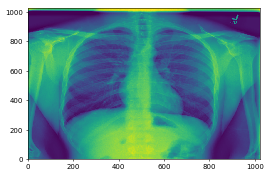

In [78]:
plt.figure(dpi=50)

plt.pcolormesh(np.flipud(ArrayDicom[:,:,125]))